In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [4]:
# read the diabetes database
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Independent variables:
Age, sex. <br>
Dependent variable:
Progression.<br>
No idea what these variables are, but I assume they affect disease progression and are independent:
s1, s2, s3, s4, s5, s6<br>

In [5]:
# X and y for multiple regression 
X = diabetes.iloc[:,:10].values
X = X.reshape(-1, X.shape[1])
y = diabetes['Progression'].values
y = y.reshape(-1,1)

# training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (353, 10) (353, 1)
Test data: (89, 10) (89, 1)


/Users/vanshikagulati/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


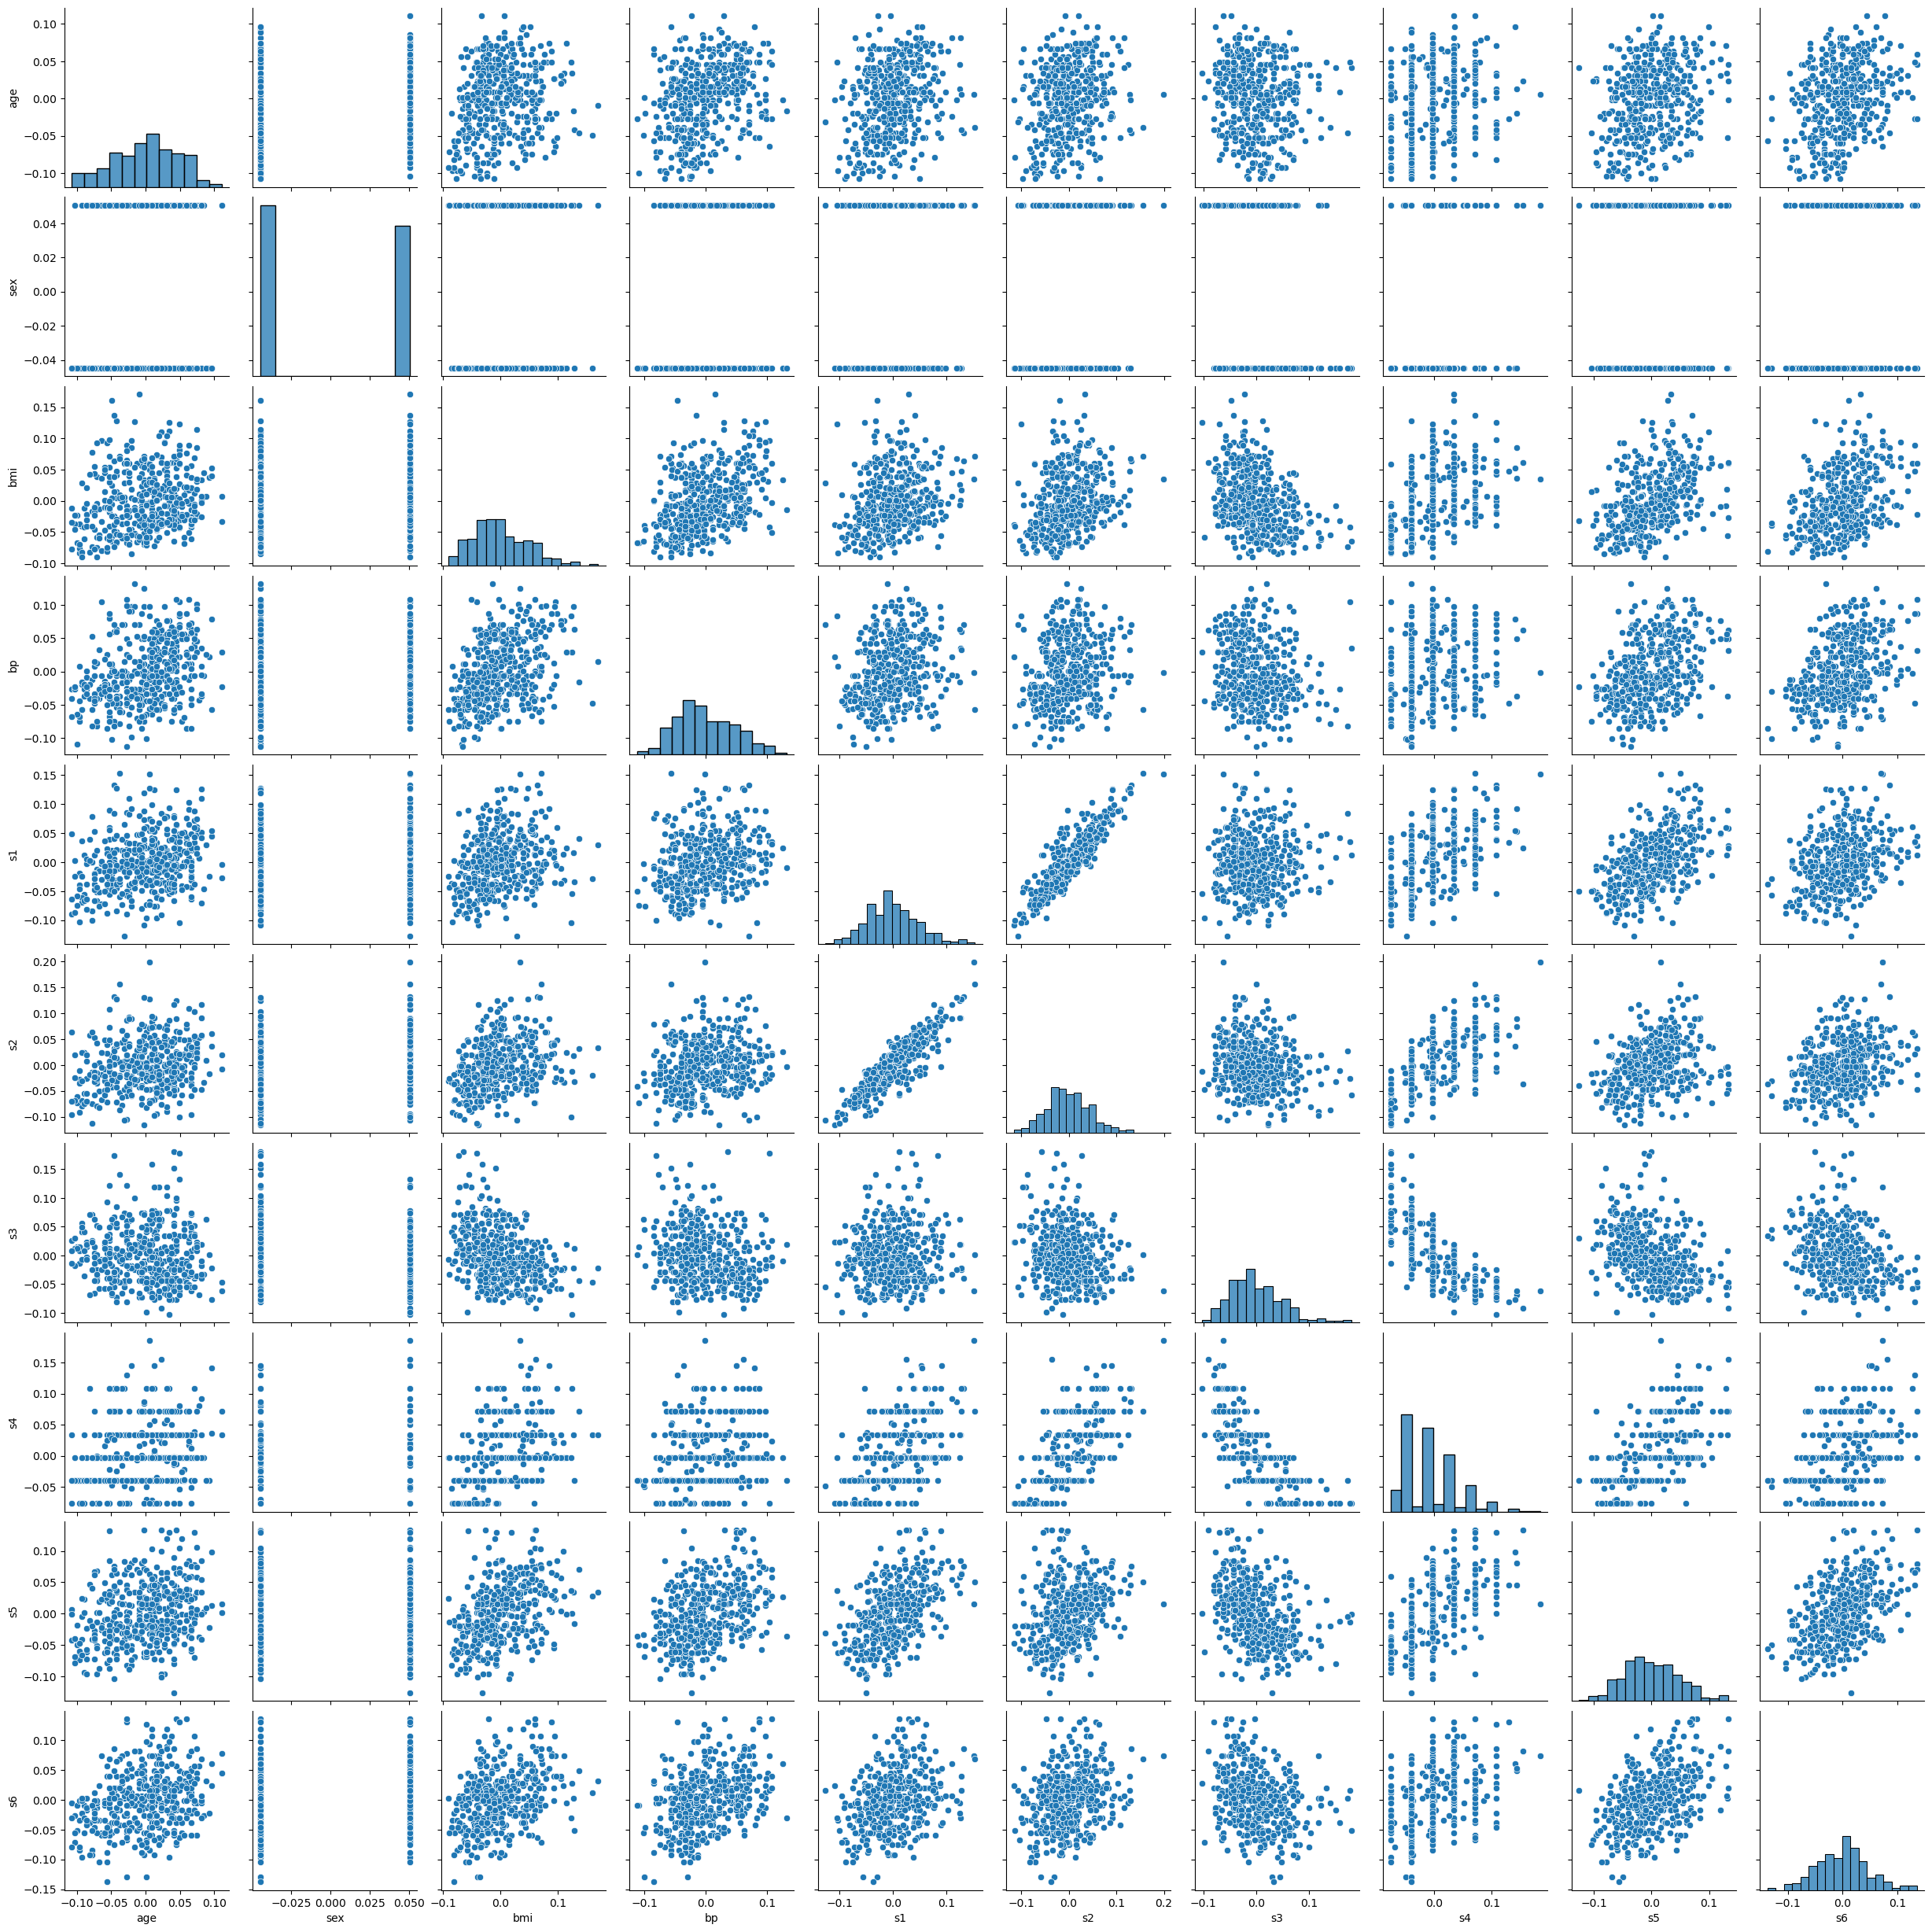

In [6]:

sns.pairplot(data=diabetes.drop('Progression', axis=1))

Looks like all categories are already standardised. Aside from sex, all independent variables roughly form a bell curve. (maybe not s4.) The instructions are a bit confusing. Specifically this part: <br>
"Use a MinMaxScaler and StandardScaler from sklearn.preprocessing. Fit these scalers on the train set and use these fit scalers to transform the train and test sets." <br>
From what I understand, this is asking me to normalise AND standardise a dataset that is already standardised? 

In [8]:
# data follows normal distribution, so can be standardised. 
standardise = StandardScaler()
standardise.fit(X_train)

# Apply the scalers on train and test data
X_train = standardise.transform(X_train)
X_test = standardise.transform(X_test)

In [9]:
# Fit a model
model = LinearRegression()
model = model.fit(X_train, y_train)

# predict values based on test data.
predictions = model.predict(X_test)

# intercept and coefficients
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)


Intercept: 
 [148.23512748]
Coefficients: 
 [[ -0.49460753  -9.80229046  23.6478009   14.95104433 -22.04023545
    8.60841394  -0.94449946   6.83256758  31.72096297   2.33956873]]


In [10]:
predictions[0:5]

array([[176.06174352],
       [191.03396134],
       [ 60.35017289],
       [191.76432109],
       [230.33394583]])

In [16]:
# R squared score
r2 = r2_score(y_test, predictions)
print(r2)

0.533672933518643


R2 score = 0.54418 <br>
The model explains about 54.4% of the variance of the data from the mean. 